# Basic Operations Solutions

In [ ]:
import sympy as smp

In [ ]:
from sympy import *
init_printing()

For each exercise, fill in the function according to its docstring. 

## Substitution

Write a function that takes a list of expressions, a variable, and a point, and evaluates each expression in the list at that point.

In [ ]:
def evaluate(exprs, x, x0):
    """
    Evaluate each expression in exprs at the point x = x0.

    >>> x, y = symbols('x y')
    >>> exprs = [x**2, cos(x), x*y]
    >>> evaluate(exprs, x, 1)
    [1, cos(1), y]
    >>> evaluate(exprs, y, 0)
    [x**2, cos(x), 0]
    """
    return [expr.subs(x, x0) for expr in exprs]

In [ ]:
x, y = symbols('x y')

In [ ]:
exprs = [x**2, cos(x), x*y]

In [ ]:
evaluate(exprs, x, 1)

In [ ]:
evaluate(exprs, y, 0)

Write a function that computes 

$$
{\underbrace{x^{{}^{.^{.^{.^x}}}}}_\text{n copies of x}}
$$

That is, `x**(x**(...x))`, with `n` copies of `x`.  In [Knuth up-arrow notation](http://en.wikipedia.org/wiki/Up_arrow_notation), $x\uparrow\uparrow n$.

In [ ]:
def uparrow(x, n):
    """
    Computes x**(x**(...x)), with n copies of x.

    >>> x = symbols('x')
    >>> uparrow(x, 3)
    x**(x**x)
    >>> uparrow(x, 1)
    x
    >>> uparrow(x**x, 3)
    (x**x)**((x**x)**(x**x))
    """
    expr = x
    for i in range(n - 1):
        expr = x**expr
    return expr

In [ ]:
x = symbols('x')

In [ ]:
uparrow(x, 3)

In [ ]:
uparrow(x, 1)

In [ ]:
uparrow(x**x, 3)

Write a function that takes a function and nests it within itself n times. 

For example, if we started with $x^x$, and $n=3$, we would end up with 

$$\left(\left(x^{x}\right)^{\left(x^{x}\right)}\right)^\left({\left(x^{x}\right)^{\left(x^{x}\right)}}\right)$$

In [ ]:
def nest(expr, x, n):
    """
    Nests expr into itself (in the variable x) n times.

    >>> x, y = symbols('x y')
    >>> nest(x**x, x, 3)
    ((x**x)**(x**x))**((x**x)**(x**x))
    >>> nest(sin(x)*cos(y), x, 2)
    sin(sin(x)*cos(y))*cos(y)
    >>> nest(sin(x)*cos(y), y, 2)
    sin(x)*cos(sin(x)*cos(y))
    >>> nest(x**2, x, 1)
    x**2
    """
    origexpr = expr
    for i in range(n - 1):
        expr = expr.subs(x, origexpr)
    return expr

In [ ]:
x, y = symbols('x y')

In [ ]:
nest(x**x, x, 3)

In [ ]:
nest(sin(x)*cos(y), x, 2)

In [ ]:
nest(sin(x)*cos(y), y, 2)

In [ ]:
nest(x**2, x, 1)

Write a function that replaces all trig functions in terms of $\sin(x)$ and $\cos(x)$. You can assume that the trig function will be of the form $t(x)$, where $x$ is the variable.  The trig functions implemented in SymPy are

$$\tan(x) = \frac{\sin(x)}{\cos(x)}$$
$$\cot(x) = \frac{\cos(x)}{\sin(x)}$$
$$\sec(x) = \frac{1}{\cos(x)}$$
$$\csc(x) = \frac{1}{\sin(x)}$$


In [ ]:
def trig_rewrite(expr, x):
    """
    Rewrite all trig functions t(x) in terms of sin(x) and cos(x)

    >>> x, y = symbols('x y')
    >>> trig_rewrite(tan(x), x)
    sin(x)/cos(x)
    >>> trig_rewrite(tan(x) + cos(x)*sec(x), x)
    sin(x)/cos(x) + 1
    >>> trig_rewrite(cot(x) + sin(x)*csc(x), x)
    1 + cos(x)/sin(x)
    >>> trig_rewrite(tan(x)*tan(y), x)
    sin(x)*tan(y)/cos(x)
    >>> trig_rewrite(tan(x)*tan(y), y)
    sin(y)*tan(x)/cos(y)
    """
    return expr.subs([(tan(x), sin(x)/cos(x)), (sec(x), 1/cos(x)), (csc(x), 1/sin(x)), (cot(x), cos(x)/sin(x))])

In [ ]:
x, y = symbols('x y')

In [ ]:
smp.tan(x).rewrite(x)

In [ ]:
eq = smp.tan(x)

In [ ]:
eq

Rewrite in term of trigonometry

In [ ]:
trig_rewrite

In [ ]:
trig_rewrite(eq, x)

In [ ]:
trig_rewrite(tan(x) + cos(x)*sec(x), x)

In [ ]:
trig_rewrite(cot(x) + sin(x)*csc(x), x)

In [ ]:
trig_rewrite(tan(x)*tan(y), x)

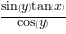

In [ ]:
trig_rewrite(tan(x)*tan(y), y)

Suppose we are working with the series expansion of a function at $x=0$, like $a_0 + a_1x + a_2x^2 + \cdots$.  In this expansion, the terms with higher powers are less significant to the calculation.  For example, if we had

$$1 + x + \frac{x^{2}}{2} + \frac{x^{3}}{6} + \frac{x^{4}}{24} + \frac{x^{5}}{120} + \frac{x^{6}}{720} + \frac{x^{7}}{5040} + \frac{x^{8}}{40320} + \frac{x^{9}}{362880}$$

We might only care about the terms with powers less than 5

$$1 + x + \frac{x^{2}}{2} + \frac{x^{3}}{6} + \frac{x^{4}}{24}$$

We will see later that this is can be done automatically using the `O` class, but it can also be done using `subs`.

In [ ]:
def series_reduce(expr, x, p):
    """
    Remove all powers of x in expr with power greater than p.

    You may assume that there are no powers of x greater than 10.

    Bonus: which functions are represented by the series expansions below (you
    can use expr.series(x, 0, 10) to check if you are right)?

    >>> x, y = symbols('x y')
    >>> series_reduce(1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320, x, 5)
    x**4/24 - x**2/2 + 1
    >>> series_reduce(1 + x + x**2 + x**3 + x**4 + x**5 + x**6 + x**7 + x**8 + x**9 + x**10, x, 0)
    1
    >>> series_reduce(x*y + x**3*y**3/3 + 2*x**5*y**5/15 + 17*x**7*y**7/315 + 62*x**9*y**9/2835, x, 5)
    2*x**5*y**5/15 + x**3*y**3/3 + x*y
    """
    return expr.subs([(x**i, 0) for i in range(11) if  i > p])

In [ ]:
x, y = symbols('x y')

In [ ]:
series_reduce(1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320, x, 5)

In [ ]:
series_reduce(1 + x + x**2 + x**3 + x**4 + x**5 + x**6 + x**7 + x**8 + x**9 + x**10, x, 0)

In [ ]:
series_reduce(x*y + x**3*y**3/3 + 2*x**5*y**5/15 + 17*x**7*y**7/315 + 62*x**9*y**9/2835, x, 5)

## Evalf

At the 762nd place in the decimal expansion of $\pi$, there is `999999` (see the below comic ref: http://www.qwantz.com/index.php?comic=1013).  Note T-Rex is counting the digits like


        π: 3 . 1 4 1 5 9
 
    digit:     1 2 3 4 5


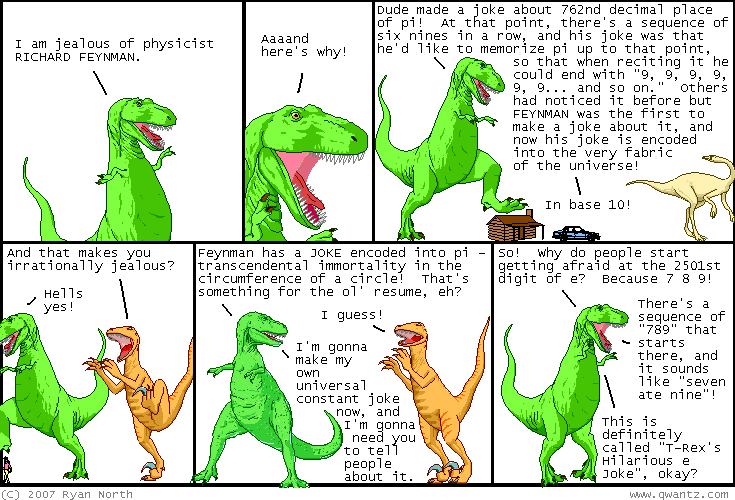

In [ ]:
from IPython.core.display import Image 
Image(filename='../imgs/comic2-1040.png') 

Write a function that takes a symbolic expression (like `pi`), and determines the first place where `999999` appears.  

Tip: Use the string representation of the number. You can take the part after the `.` by using `split('.', 2)[1]`.

In [ ]:
'1.2345'.split('.', 2)[1]

'2345'

And remember that Python starts counting at `0`, so if you use `str.find`, you'll need to add one.

In [ ]:
str(1.2345).split('.', 2)[1].find('345')

In [ ]:
str(1.2345).split('.', 2)[1].find('345') + 1

And remember that `str.find` returns `-1` if it cannot find the string.

In [ ]:
'abcd'.find('def')

In [ ]:
def find_999999(expr, limit=100000):
    """
    Find the first place in the decimal expr where 999999 appears.

    Only checks up to limit digits. 

    Returns False when 999999 does not appear.

    >>> find_999999(pi)
    762
    >>> find_999999(E)
    False
    >>> find_999999(E, 1000000) # This one will take a few seconds to compute
    384340
    """
    found = str(expr.evalf(limit)).split('.', 2)[1].find('999999') + 1
    if found == 0:
        return False
    return found

In [ ]:
find_999999(pi)

In [ ]:
find_999999(E)

False

In [ ]:
find_999999(E, 1000000)